# SQL modification statements

## Preparation

For this section you need `chinook.db` database file and working `%sql` magic.  
If you don't have it, please go back to the [previous section](../09_sql/connect_to_database.ipynb) and follow the instructions.  
The following code should not produce any errors:

In [1]:
%load_ext sql
%sql sqlite:///chinook.db

Deploy Dash apps for free on Ploomber Cloud! Learn more: https://ploomber.io/s/signup


Connecting to 'sqlite:///chinook.db'

## UPDATE - change existing rows

### Overview

To update existing data in a table, you use the `UPDATE` statement.

```sql
UPDATE table
   SET column_1 = new_value_1,
       column_2 = new_value_2
   WHERE
       search_condition 
   ORDER column_or_expression
   LIMIT row_count OFFSET offset
```

You need/may specify:
- Name of the `table` where you want to make changes.
- Names of the columns and their new value(s) in the `SET` clause.
- Which rows to update using a condition in the `WHERE` clause. The `WHERE` clause is optional. If you skip it, the `UPDATE` statement will update data in all rows of the table.
- Finally, use the `ORDER BY` and `LIMIT` clauses in the `UPDATE` statement to specify the number of rows to update.

*Notes:*
- If you use a negative value in the `LIMIT` clause, SQL updates all rows that meet the condition in the preceding `WHERE ` clause.
- The `ORDER BY` clause should always goes with the `LIMIT` clause to specify exactly which rows to be updated. Otherwise, you will never know which row will be actually updated; because without the `ORDER BY` clause, the order of rows in the table is unspecified.

### Example

We use the `employees` table in the sample database to demonstrate the `UPDATE` statement.

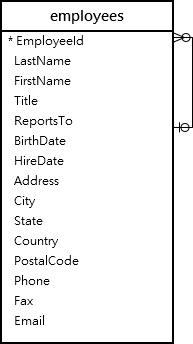

The following `SELECT` statement gets partial data from the `employees` table:

In [2]:
%%sql
SELECT EmployeeId, FirstName, LastName, Title, Email
  FROM employees
  ORDER BY EmployeeId LIMIT 5

Running query in 'sqlite:///chinook.db'

EmployeeId,FirstName,LastName,Title,Email
1,Andrew,Adams,General Manager,andrew@chinookcorp.com
2,Nancy,Edwards,Sales Manager,nancy@chinookcorp.com
3,Jane,Smith,Sales Support Agent,jane@chinookcorp.com
4,Margaret,Park,Sales Support Agent,margaret@chinookcorp.com
5,Steve,Johnson,Sales Support Agent,steve@chinookcorp.com


Let's suppose that *Jane* changed her last name to *Smith*. You can perform such update as follows:

In [5]:
%%sql
UPDATE employees
  SET LastName = 'Smith'
  WHERE EmployeeId = 3

Running query in 'sqlite:///chinook.db'

1 rows affected.

++
||
++
++

To verify the `UPDATE` let's show the same few rows again:

In [6]:
%%sql
SELECT EmployeeId, FirstName, LastName, Title, Email
  FROM employees
  ORDER BY EmployeeId LIMIT 5

Running query in 'sqlite:///chinook.db'

EmployeeId,FirstName,LastName,Title,Email
1,Andrew,Adams,General Manager,andrew@chinookcorp.com
2,Nancy,Edwards,Sales Manager,nancy@chinookcorp.com
3,Jane,Smith,Sales Support Agent,jane@chinookcorp.com
4,Margaret,Park,Sales Support Agent,margaret@chinookcorp.com
5,Steve,Johnson,Sales Support Agent,steve@chinookcorp.com


## INSERT - add new rows

### Overview

To insert data into a table, you use the `INSERT` statement:

```sql
INSERT INTO table (column_1, column_2, column_3)
  VALUES (new_value_1, new_value_2, new_value_3) 
```

The columns of a table which are not listed will get their default values.

### Example (insert a provided value)

We will use the `artists` table in the sample database for the demonstration.

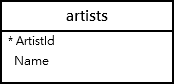

In [12]:
%sql SELECT * FROM artists LIMIT 5

Running query in 'sqlite:///chinook.db'

ArtistId,Name
1,AC/DC
2,Accept
3,Aerosmith
4,Alanis Morissette
5,Alice In Chains


Let's first check the number of records in the `artists` table:

In [7]:
%sql SELECT COUNT(*) FROM artists

Running query in 'sqlite:///chinook.db'

COUNT(*)
275


The following statement inserts a new row into the `artists` table:

In [8]:
%%sql
INSERT INTO artists (Name)
   VALUES('Bud Powell')

Running query in 'sqlite:///chinook.db'

1 rows affected.

++
||
++
++

Let's check the count of rows after the insert:

In [9]:
%sql SELECT COUNT(*) FROM artists

Running query in 'sqlite:///chinook.db'

COUNT(*)
276


Because the `ArtistId` column is an auto-increment column, you can ignore it in the statement. SQL will automatically geneate a sequential integer number to insert into the `ArtistId` column.

You can verify the insert operation by using the following `SELECT` statement:

In [13]:
%%sql
SELECT *
  FROM artists
  ORDER BY ArtistId DESC LIMIT 5

Running query in 'sqlite:///chinook.db'

ArtistId,Name
276,Bud Powell
275,Philip Glass Ensemble
274,Nash Ensemble
273,"C. Monteverdi, Nigel Rogers - Chiaroscuro; London Baroque; London Cornett & Sackbu"
272,Emerson String Quartet


### Example (insert default values)

`INSERT DEFAULT VALUES` adds a new row into a table using the default values specified in the column definition or `NULL` if the default value is not available and the column does not have a `NOT NULL` constraint. For autoincrement columns, the default value is the next integer.

For example, the following statement inserts a new row into the `artists` table using `INSERT DEFAULT VALUES`:

In [14]:
%%sql
INSERT INTO artists 
  DEFAULT VALUES 

Running query in 'sqlite:///chinook.db'

1 rows affected.

++
||
++
++

Let's verify the recent insert:

In [15]:
%%sql
SELECT *
  FROM artists
  ORDER BY ArtistId DESC LIMIT 5

Running query in 'sqlite:///chinook.db'

ArtistId,Name
277,None
276,Bud Powell
275,Philip Glass Ensemble
274,Nash Ensemble
273,"C. Monteverdi, Nigel Rogers - Chiaroscuro; London Baroque; London Cornett & Sackbu"


### Example (insert many rows from another `SELECT` statement)

Suppose you want to backup the `artists` table. You can follow these steps:
- Create a new table named `artists_backup`.
- Insert data from `artists` into the `artists_backup`.
- (To clean up) Drop the new table.

Let's create the new table:

In [16]:
%%sql
CREATE TABLE artists_backup(
   ArtistId INTEGER PRIMARY KEY AUTOINCREMENT,
   Name NVARCHAR
)

Running query in 'sqlite:///chinook.db'

++
||
++
++

There should be no content in the new table:

In [17]:
%sql SELECT * FROM artists_backup LIMIT 5

Running query in 'sqlite:///chinook.db'

ArtistId,Name


Let's insert new data:

In [18]:
%%sql
INSERT INTO artists_backup 
  SELECT ArtistId, Name
  FROM artists;

Running query in 'sqlite:///chinook.db'

277 rows affected.

++
||
++
++

Has the data been copied?:

In [19]:
%sql SELECT * FROM artists_backup LIMIT 5

Running query in 'sqlite:///chinook.db'

ArtistId,Name
1,AC/DC
2,Accept
3,Aerosmith
4,Alanis Morissette
5,Alice In Chains


Let's clean up:

In [20]:
%sql DROP TABLE artists_backup

Running query in 'sqlite:///chinook.db'

RuntimeError: (sqlite3.OperationalError) database table is locked
[SQL: DROP TABLE artists_backup]
(Background on this error at: https://sqlalche.me/e/20/e3q8)
If you need help solving this issue, send us a message: https://ploomber.io/community


Display the names of sql database tables:

In [21]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('chinook.db')
cursor = conn.cursor()

# Query to retrieve all table names
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Fetch all results
tables = cursor.fetchall()

# Display the table names
for table in tables:
    print(table[0])

# Close the connection
conn.close()


albums
sqlite_sequence
artists
customers
employees
genres
invoices
invoice_items
media_types
playlists
playlist_track
tracks
sqlite_stat1
artists_backup


In [24]:
%sql SELECT * FROM albums LIMIT 5

Running query in 'sqlite:///chinook.db'

AlbumId,Title,ArtistId
1,For Those About To Rock We Salute You,1
2,Balls to the Wall,2
3,Restless and Wild,2
4,Let There Be Rock,1
5,Big Ones,3


In [25]:
%sql SELECT * FROM artists LIMIT 5

Running query in 'sqlite:///chinook.db'

ArtistId,Name
1,AC/DC
2,Accept
3,Aerosmith
4,Alanis Morissette
5,Alice In Chains


Display the table in rows:

In [23]:
# Connect to the SQLite database
conn = sqlite3.connect('chinook.db')
cursor = conn.cursor()

# Specify the table name you want to view
table_name = 'albums'

# Query to select all rows from the specified table
cursor.execute(f"SELECT * FROM {table_name};")

# Fetch all results
rows = cursor.fetchall()

# Display the rows
for row in rows:
    print(row)

# Close the connection
conn.close()

(1, 'For Those About To Rock We Salute You', 1)
(2, 'Balls to the Wall', 2)
(3, 'Restless and Wild', 2)
(4, 'Let There Be Rock', 1)
(5, 'Big Ones', 3)
(6, 'Jagged Little Pill', 4)
(7, 'Facelift', 5)
(8, 'Warner 25 Anos', 6)
(9, 'Plays Metallica By Four Cellos', 7)
(10, 'Audioslave', 8)
(11, 'Out Of Exile', 8)
(12, 'BackBeat Soundtrack', 9)
(13, 'The Best Of Billy Cobham', 10)
(14, 'Alcohol Fueled Brewtality Live! [Disc 1]', 11)
(15, 'Alcohol Fueled Brewtality Live! [Disc 2]', 11)
(16, 'Black Sabbath', 12)
(17, 'Black Sabbath Vol. 4 (Remaster)', 12)
(18, 'Body Count', 13)
(19, 'Chemical Wedding', 14)
(20, 'The Best Of Buddy Guy - The Millenium Collection', 15)
(21, 'Prenda Minha', 16)
(22, 'Sozinho Remix Ao Vivo', 16)
(23, 'Minha Historia', 17)
(24, 'Afrociberdelia', 18)
(25, 'Da Lama Ao Caos', 18)
(26, 'Acústico MTV [Live]', 19)
(27, 'Cidade Negra - Hits', 19)
(28, 'Na Pista', 20)
(29, 'Axé Bahia 2001', 21)
(30, 'BBC Sessions [Disc 1] [Live]', 22)
(31, 'Bongo Fury', 23)
(32, 'Carnaval 

## DELETE - remove rows

### Overview

The `DELETE` statement allows you to delete one row, multiple rows, or all rows in a table. The syntax of the `DELETE` statement is as follows:

```sql
DELETE FROM table
  WHERE condition
```

### Example (removing rows matching a condition)

Let's create a playground by recreating the same table `artists_backup` as used in the `INSERT` exercise  
(*Note:* You need semicolons at line ends to have multiple SQL statements in one Jupyter cell):

In [26]:
%%sql
DROP TABLE IF EXISTS artists_backup;
CREATE TABLE artists_backup(
   ArtistId INTEGER PRIMARY KEY AUTOINCREMENT,
   Name NVARCHAR
);
INSERT INTO artists_backup 
   SELECT ArtistId, Name
   FROM artists;

Running query in 'sqlite:///chinook.db'

RuntimeError: (sqlite3.OperationalError) database table is locked
[SQL: DROP TABLE IF EXISTS artists_backup;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)
If you need help solving this issue, send us a message: https://ploomber.io/community


Let's list all rows with artists' `Name`s starting with `E`:

In [27]:
%sql SELECT * FROM artists_backup WHERE Name LIKE "E%"

Running query in 'sqlite:///chinook.db'

ArtistId,Name
37,Ed Motta
41,Elis Regina
49,"Edson, DJ Marky & DJ Patife Featuring Fernanda Porto"
81,Eric Clapton
208,English Concert & Trevor Pinnock
226,Eugene Ormandy
235,"Emanuel Ax, Eugene Ormandy & Philadelphia Orchestra"
242,Edo de Waart & San Francisco Symphony
263,"Equale Brass Ensemble, John Eliot Gardiner & Munich Monteverdi Orchestra and Choir"
272,Emerson String Quartet


All these artists can be removed as follows:

In [28]:
%%sql 
DELETE FROM artists_backup 
  WHERE Name LIKE "E%"

Running query in 'sqlite:///chinook.db'

10 rows affected.

++
||
++
++

Let's check:

In [29]:
%sql SELECT * FROM artists_backup WHERE Name LIKE "E%"

Running query in 'sqlite:///chinook.db'

ArtistId,Name


### Example (removing all rows, but keeping the table)

To remove all rows in the `artists_backup` table, you just need to omit the `WHERE` clause as the following statement:

In [30]:
%%sql
DELETE FROM artists_backup

Running query in 'sqlite:///chinook.db'

267 rows affected.

++
||
++
++

Let's check:

In [31]:
%sql SELECT * FROM artists_backup

Running query in 'sqlite:///chinook.db'

ArtistId,Name
